In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm  # acf,pacf plot
from statsmodels.graphics.gofplots import qqplot

In [68]:
def acf_pacf_plot(seq,acf_lags=20,pacf_lags=20):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(seq, lags=acf_lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(seq, lags=pacf_lags, ax=ax2)
    plt.show()


In [69]:
def evaluation_metric(y_test,y_hat):
    MSE = metrics.mean_squared_error(y_test, y_hat)
    RMSE = MSE**0.5
    MAE = metrics.mean_absolute_error(y_test,y_hat)
    R2 = metrics.r2_score(y_test,y_hat)
    print('MSE: %.5f' % MSE)
    print('RMSE: %.5f' % RMSE)
    print('MAE: %.5f' % MAE)
    print('R2: %.5f' % R2)

In [70]:
def adf_test(temp):
    # p-value>0.562 or Critical Value(1%)>-3.44, non-stationary
    t = adfuller(temp)
    output = pd.DataFrame(index=['Test Statistic Value', 'p-value', 'Lags Used', 'Number of Observations Used', 'Critical Value(1%)', 'Critical Value(5%)', 'Critical Value(10%)'], columns=['value'])
    output['value']['Test Statistic Value'] = t[0]
    output['value']['p-value'] = t[1]
    output['value']['Lags Used'] = t[2]
    output['value']['Number of Observations Used'] = t[3]
    output['value']['Critical Value(1%)'] = t[4]['1%']
    output['value']['Critical Value(5%)'] = t[4]['5%']
    output['value']['Critical Value(10%)'] = t[4]['10%']
    print(output)

In [71]:
data = pd.read_csv("C:\MTech\Second Semester\Advanced Time Series Analysis(IT833)\Project\Data\TCS.csv")
test_set2 = data.loc[3501:, :] 
data.index = pd.to_datetime(data['Date'], format='%Y-%m-%d') 
data = data.drop(['Date'], axis=1)
data = pd.DataFrame(data, dtype=np.float64)

In [72]:
training_set = data.loc['2008-04-29':'2022-07-12', :]
test_set = data.loc['2022-07-13':, :]

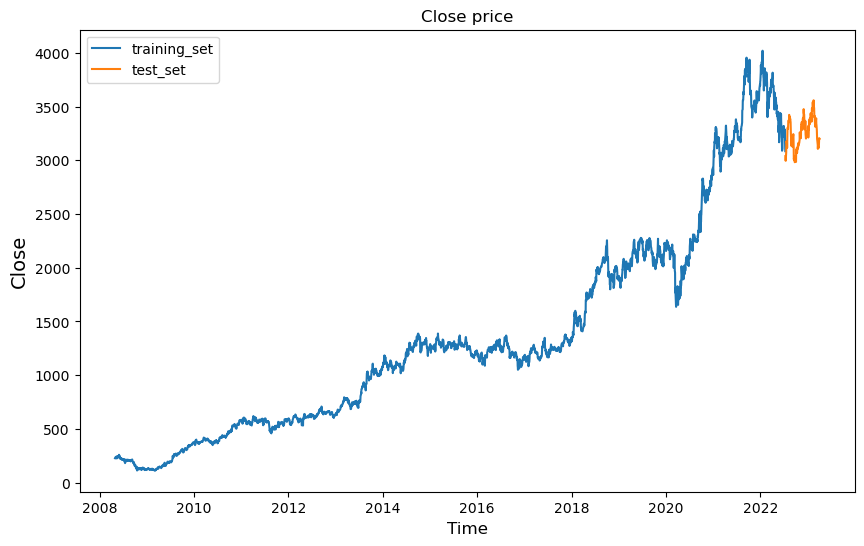

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(training_set['Close'], label='training_set')
plt.plot(test_set['Close'], label='test_set')
plt.title('Close price')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()

In [74]:
temp = np.array(training_set['Close'])

C:\Users\jaimi\AppData\Local\Temp\ipykernel_26844\2148328299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['diff_1'] = training_set['Close'].diff(1)


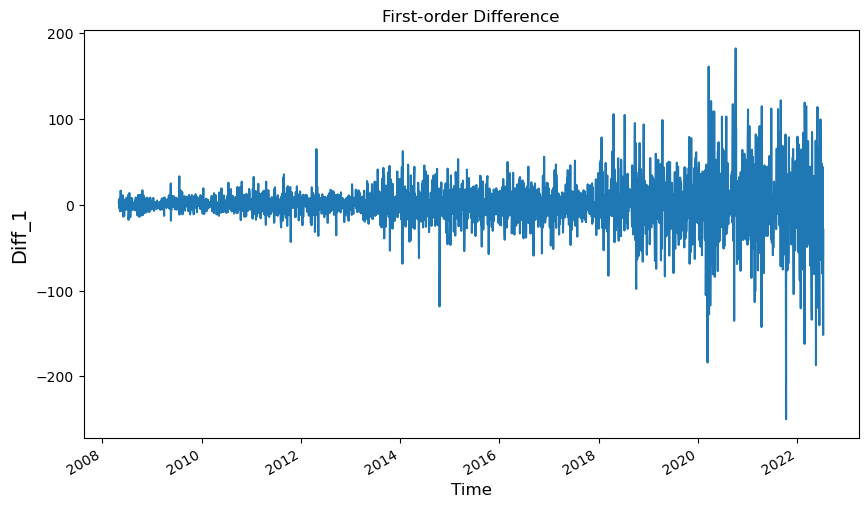

In [75]:
# First-order diff
training_set['diff_1'] = training_set['Close'].diff(1)
plt.figure(figsize=(10, 6))
training_set['diff_1'].plot()
plt.title('First-order Difference')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Diff_1', fontsize=14, horizontalalignment='center')
plt.show()

C:\Users\jaimi\AppData\Local\Temp\ipykernel_26844\2432366484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['diff_2'] = training_set['diff_1'].diff(1)


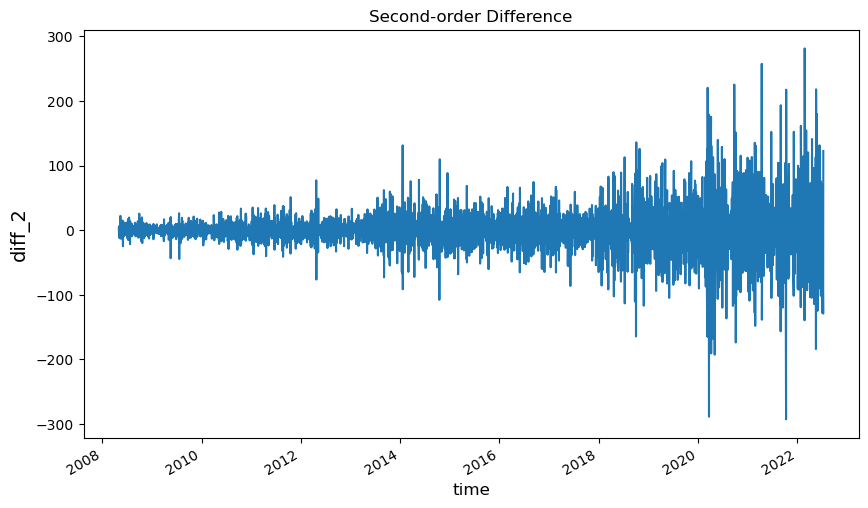

In [76]:
# Second-order diff
training_set['diff_2'] = training_set['diff_1'].diff(1)
plt.figure(figsize=(10, 6))
training_set['diff_2'].plot()
plt.title('Second-order Difference')
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('diff_2', fontsize=14, horizontalalignment='center')
plt.show()

In [77]:
temp1 = np.diff(training_set['Close'], n=1)

In [78]:
# white noise test
training_data1 = training_set['Close'].diff(1)
# training_data1_nona = training_data1.dropna()
temp2 = np.diff(training_set['Close'], n=1)
# print(acorr_ljungbox(training_data1_nona, lags=2, boxpierce=True, return_df=True))
print(acorr_ljungbox(temp2, lags=2, boxpierce=True))
# p-value=1.53291527e-08, non-white noise time-seriess

     lb_stat  lb_pvalue    bp_stat  bp_pvalue
1   0.058655   0.808635   0.058605   0.808715
2  10.071645   0.006501  10.060158   0.006538


c:\Users\jaimi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


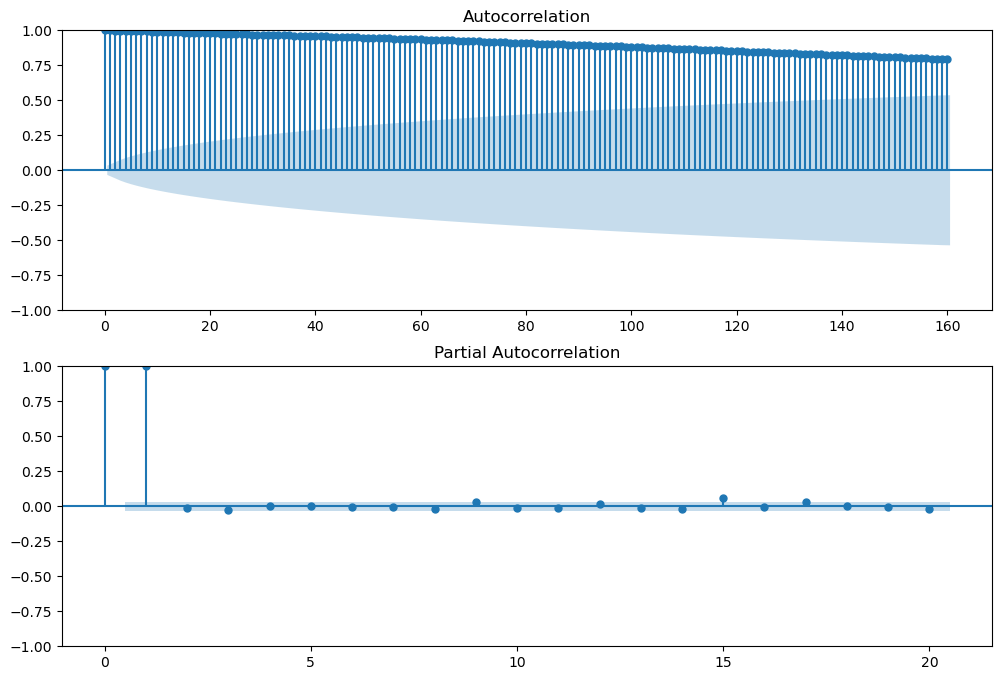

In [79]:
acf_pacf_plot(training_set['Close'],acf_lags=160)

In [80]:
price = list(temp2)
data2 = {
    'Date': training_set['diff_1'].index[1:], 
    'Close': price
}

In [81]:
df = pd.DataFrame(data2)
df['Date'] = pd.to_datetime(df['Date'], format='%-Y%m-%d')

In [82]:
training_data_diff = df.set_index(['Date'], drop=True)
print('&', training_data_diff)

&                  Close
Date                  
2008-04-30    2.612503
2008-05-02    5.687500
2008-05-05   -4.074997
2008-05-06    2.399994
2008-05-07    7.425003
...                ...
2022-07-06   44.449951
2022-07-07   27.100098
2022-07-08  -22.400146
2022-07-11 -151.649902
2022-07-12  -29.100098

[3500 rows x 1 columns]


c:\Users\jaimi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


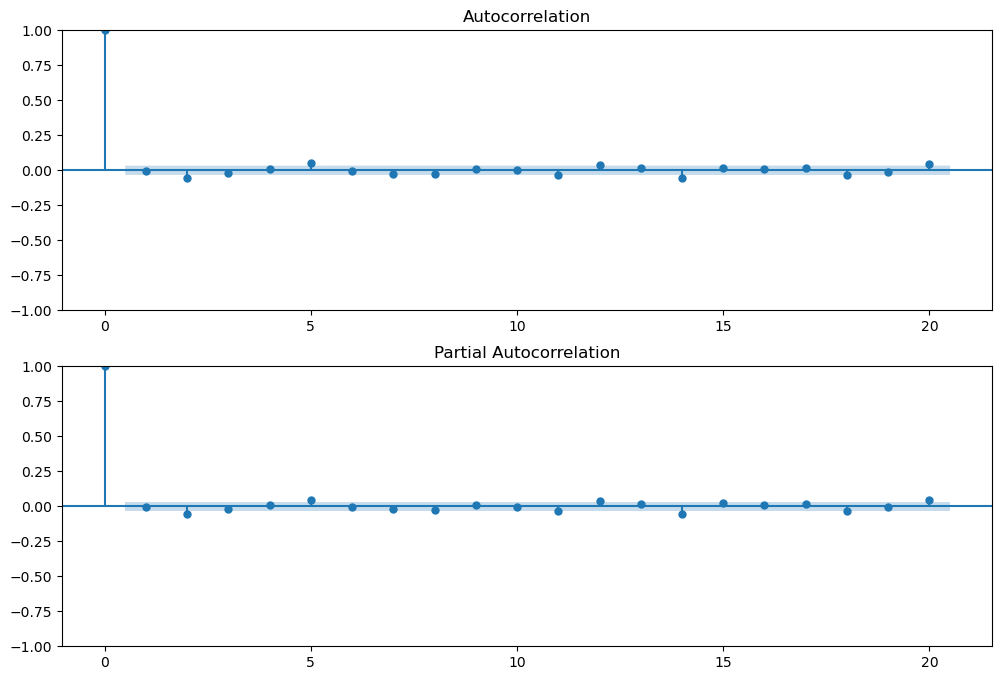

In [83]:
acf_pacf_plot(training_data_diff)

In [84]:
# order=(p,d,q)
model = sm.tsa.ARIMA(endog=training_set['Close'], order=(2, 1, 0)).fit()
#print(model.summary())

c:\Users\jaimi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaimi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaimi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
history = [x for x in training_set['Close']]
# print('history', type(history), history)
predictions = list()
# print('test_set.shape', test_set.shape[0])
for t in range(test_set.shape[0]):
    model1 = sm.tsa.ARIMA(history, order=(2, 1, 0))
    model_fit = model1.fit()
    yhat = model_fit.forecast()
    yhat = float(yhat[0])
    predictions.append(yhat)
    obs = test_set2.iloc[t, 5]
    # obs = np.float(obs)
    # print('obs', type(obs))
    history.append(obs)
    # print(test_set.index[t])
    # print(t+1, 'predicted=%f, expected=%f' % (yhat, obs))
#print('predictions', predictions)

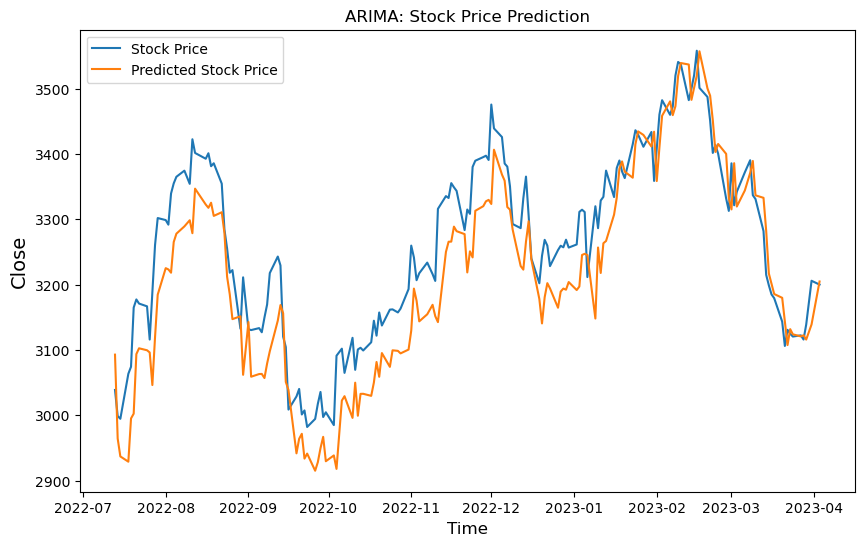

In [86]:
predictions1 = {
    'Date': test_set.index[:],
    'Close': predictions
}
predictions1 = pd.DataFrame(predictions1)
predictions1 = predictions1.set_index(['Date'], drop=True)
predictions1.to_csv("C:\MTech\Second Semester\Advanced Time Series Analysis(IT833)\Project\Data\ARIMA.csv")
plt.figure(figsize=(10, 6))
plt.plot(test_set['Close'], label='Stock Price')
plt.plot(predictions1, label='Predicted Stock Price')
plt.title('ARIMA: Stock Price Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()

c:\Users\jaimi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaimi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaimi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


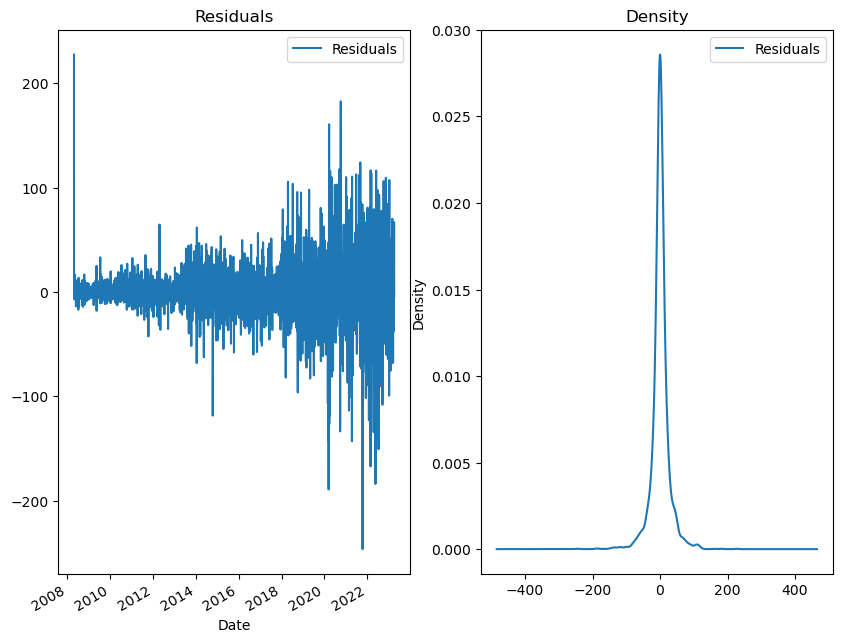

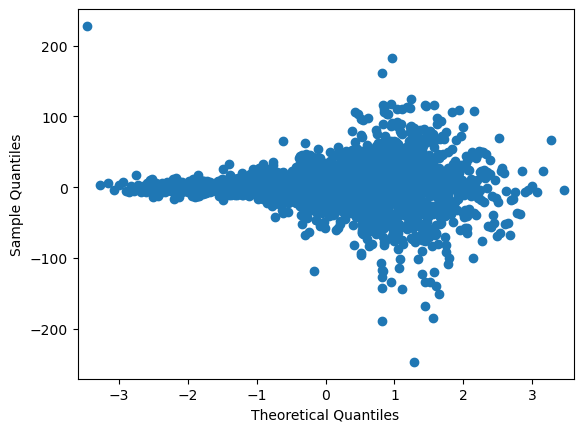

MSE: 5074.52326
RMSE: 71.23569
MAE: 60.02905
R2: 0.73564
                                value
Test Statistic Value         0.201627
p-value                      0.972353
Lags Used                          30
Number of Observations Used      3470
Critical Value(1%)          -3.432236
Critical Value(5%)          -2.862373
Critical Value(10%)         -2.567214
                                value
Test Statistic Value        -13.10081
p-value                           0.0
Lags Used                          30
Number of Observations Used      3469
Critical Value(1%)          -3.432236
Critical Value(5%)          -2.862374
Critical Value(10%)         -2.567214


In [87]:
model2 = sm.tsa.ARIMA(endog=data['Close'], order=(2, 1, 0)).fit()
residuals = pd.DataFrame(model2.resid)
residuals.columns = ['Residuals']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
qqplot(residuals)
plt.show()
residuals.to_csv("C:\MTech\Second Semester\Advanced Time Series Analysis(IT833)\Project\Data\ARIMA_residuals1.csv")
evaluation_metric(test_set['Close'],predictions)
adf_test(temp)
adf_test(temp1)

# Date
2022-06-13    3358.910154
2022-06-14    3223.617580
2022-06-15    3217.994974
2022-06-16    3206.792460
2022-06-17    3142.438156
2022-06-20    3092.474519
2022-06-21    3115.128208
2022-06-22    3210.377363
2022-06-23    3217.652182
2022-06-24    3307.933586
2022-06-27    3288.615044
2022-06-28    3315.457963
2022-06-29    3316.996889
2022-06-30    3290.409496
2022-07-01    3268.639112
2022-07-04    3316.177377
2022-07-05    3232.779089
2022-07-06    3220.592978
2022-07-07    3261.593321
2022-07-08    3285.410909
2022-07-11    3264.092098
2022-07-12    3115.487534
dtype: float64


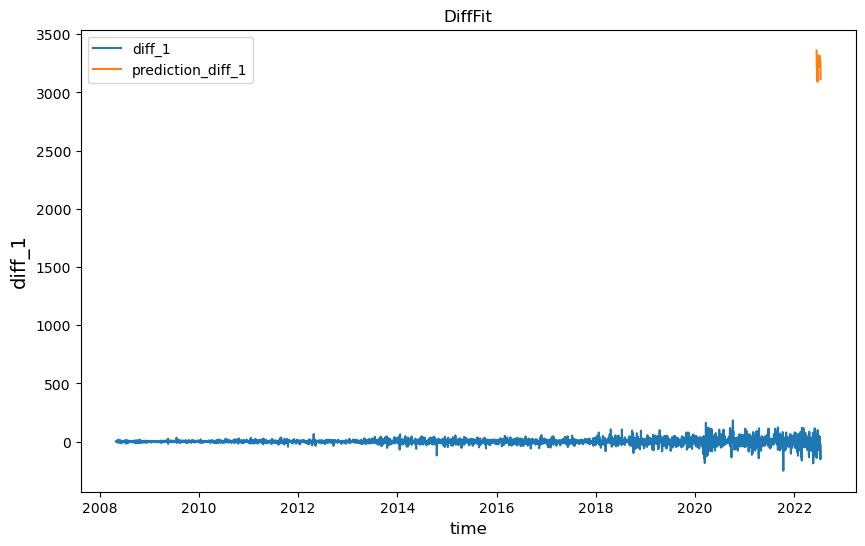

In [88]:
predictions_ARIMA_diff = pd.Series(model.fittedvalues, copy=True)
predictions_ARIMA_diff = predictions_ARIMA_diff[3479:]
print('#', predictions_ARIMA_diff)
plt.figure(figsize=(10, 6))
plt.plot(training_data_diff, label="diff_1")
plt.plot(predictions_ARIMA_diff, label="prediction_diff_1")
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('diff_1', fontsize=14, horizontalalignment='center')
plt.title('DiffFit')
plt.legend()
plt.show()